In [9]:
using PyPlot

#Order-1 Auto-regressive Modelling

###Gaussian Distributed Error Terms

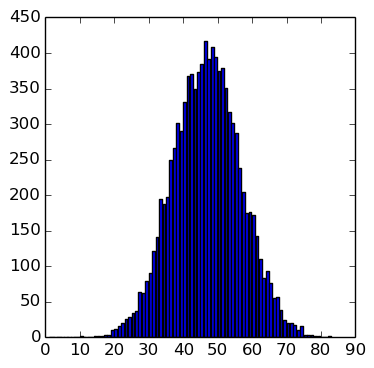

In [11]:
h = hist(randn(10000),100)
figure(figsize=(4,4))
bar(collect(1:length(h[2])),h[2]);

# Generator of auto-regressive series

In [12]:
function AR1(a, b = 1, c = 0, y0 = 1, N = 10000)

    y = zeros(N)
    y[1] = y0

    for i in 2:N
        y[i] = c + a*y[i-1] + b*randn()
    end
    return y
end

AR1 (generic function with 5 methods)

#Auto-correlation function

In [4]:
function ACF(y::Vector{Float64},order=10)
    u = mean(y)
    sigma = var(y)
    c = Float64[]
    for p in 1:order
        push!(c,mean((y[1:end-p+1]-u).*(y[p:end]-u))/sigma)
    end
    return c
end

ACF (generic function with 2 methods)

# AR(1) series:
# $$y_t = -0.9 \cdot y_{t-1} + 1 \cdot \epsilon_t + 0 $$

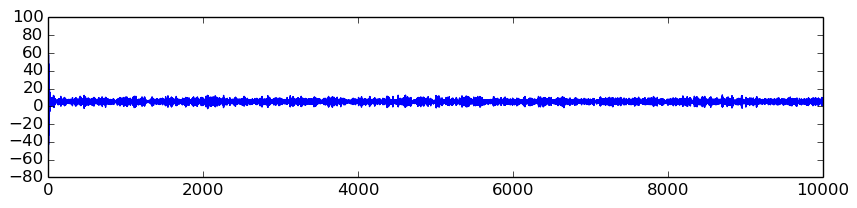

In [5]:
N = 100
a = -0.9
b = 1
c = 0
y0 = 10
y = AR1(a,b,y0,N)
figure(figsize=(10,2))
plot(collect(1:length(y)),y);

#ACF of the series

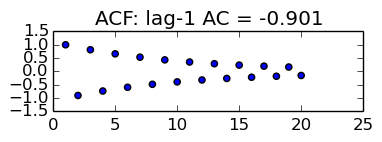

PyObject <matplotlib.text.Text object at 0x7f8b622cfd90>

In [15]:
acfy = ACF(y,20)
figure(figsize=(4,1))
scatter(collect(1:length(acfy)),acfy);
title("ACF: lag-1 AC = $(round(acfy[2],3))")

# Miscellaneous

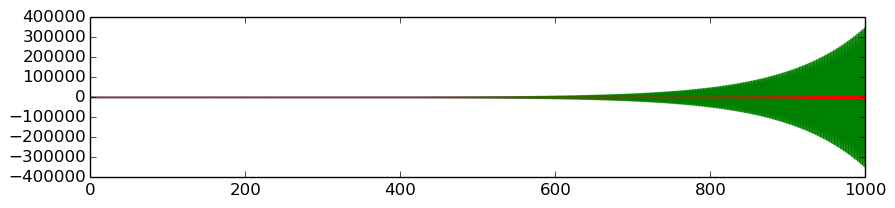

In [116]:
N = 1000
a = -1.01
b = 1
c = 0
y0 = 10
figure(figsize=(10,2))
for i in 1:3
    plot(collect(1:N),AR1(a,b,c,y0,N))
end

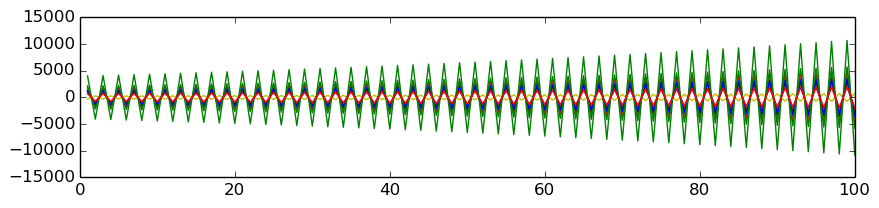

In [118]:
N = 1000
a = -1.01
b = 1
c = 0
y0 = 10
figure(figsize=(10,2))
for i in 1:10
    plot(collect(1:100),AR1(a,b,c,y0,N)[501:600])
end

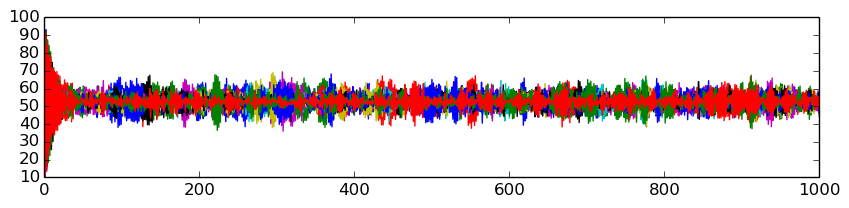

In [120]:
N = 1000
a = -0.9
b = 2
c = 100
y0 = 10
figure(figsize=(10,2))
for i in 1:10
    plot(collect(1:N),AR1(a,b,c,y0,N))
end

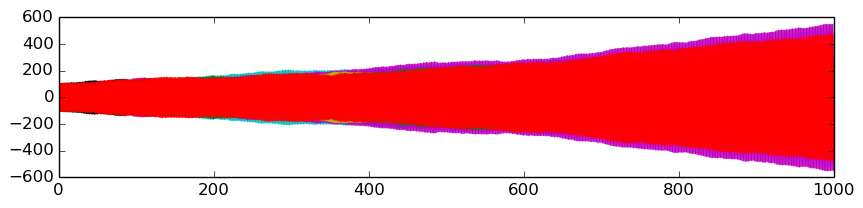

In [121]:
N = 1000
a = -1.001
b = 1.5
c = 0
y0 = 100
figure(figsize=(10,2))
for i in 1:10
    plot(collect(1:N),AR1(a,b,c,y0,N))
end

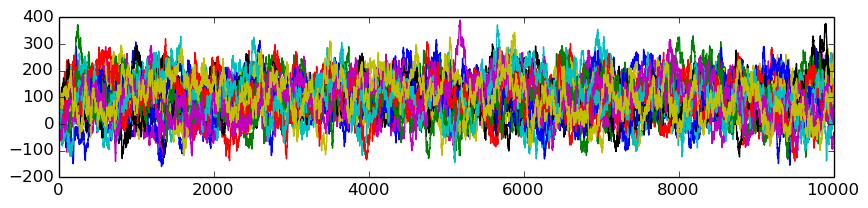

(98.68819359846712,99.99999999999991)

In [134]:
N = 10000
a = 0.99
b = 10
c = 1
y0 = 1
figure(figsize=(10,2))
m=Float64[]
for i in 1:20
    y_ = AR1(a,b,c,y0,N)
    plot(collect(1:N), y_)
    push!(m,mean(y_))
end
mean(m),c/(1-a)

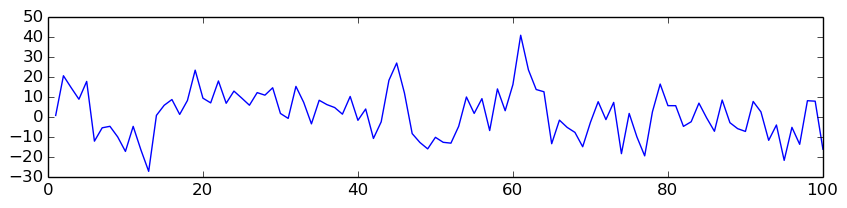

In [141]:
N = 100
a = 0.5
b = 10
c = 0
y0 = 1
figure(figsize=(10,2))
for i in 1:1
    plot(collect(1:N),AR1(a,b,c,y0,N))
end

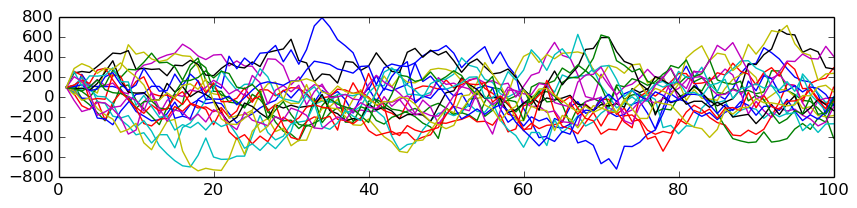

Variance: 52631.578947368434
Estimate: 45754.74957309487


In [158]:
N = 100
a = 0.9
b = 100
c = 0
y0 = 100
v = Float64[]
figure(figsize=(10,2))
for i in 1:20
    y_= AR1(a,b,c,y0,N)
    plot(collect(1:N),y_)
    push!(v,var(y_))
end

println("Variance: ", b^2/(1 - a^2))
println("Estimate: ",mean(v))

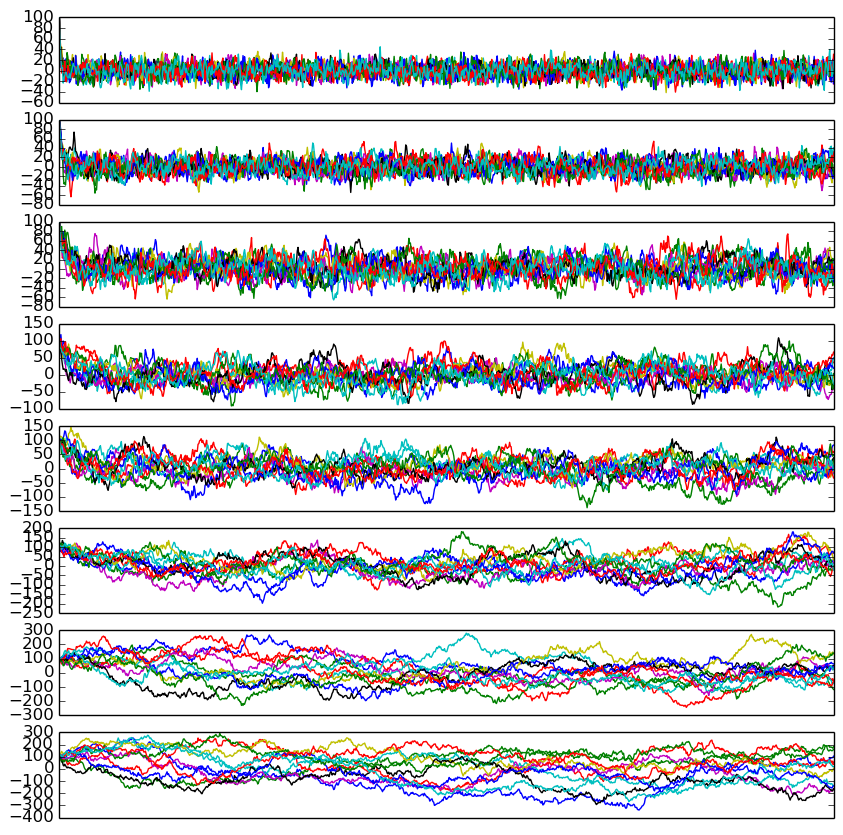

In [144]:
N = 1000

fig = figure("pyplot_subplot_mixed",figsize=(10,10)) # Create a new blank figure
for i in 1:8
    a = 1 - 0.5^i
    b = 10
    c = 0
    y0 = 100
    id = 810+i
    subplot(id) # Create the 1st axis of a 2x2 arrax of axes
    y = AR1(a,b,c,y0,N)
    for i in 1:10
        y = hcat(y,AR1(a,b,c,y0,N))
    end
    plot(collect(1:N),y)
    
    ax = gca()
    ax[:xaxis][:set_major_locator](plt[:NullLocator]())   
end